# Imports

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint as pp

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, f1_score, precision_score, precision_recall_curve, 
                             recall_score, confusion_matrix, roc_curve, auc, classification_report)

# A. Data Preprocessing and Imputation

## 1. Load and Prepare Data

In [2]:
PATH = "UCI_Credit_Card.csv"
data = pd.read_csv(PATH, index_col=0)
print(f"Dataset shape: {data.shape}")
data.head()

Dataset shape: (30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# let us check for missing values
print(data.isnull().sum())

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


There are no null values in the dataset.

In [4]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [61]:
X = data.drop(columns=['default.payment.next.month'])
y = data['default.payment.next.month'].copy()

Let us *artificially* introduce **missing values** in the dataset (**MAR** null values- *missing at random* null values).

In [62]:
# 5-10% in 2-3 numerical feature columns
selected_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT4']
np.random.seed(42)
drop_pcts = [np.random.uniform(0.05, 0.1) for _ in range(len(selected_features))]
print(drop_pcts)
for idx, feature in enumerate(selected_features):
    drop_indices = X.sample(frac=drop_pcts[idx]).index
    X.loc[drop_indices, feature] = np.nan

[0.06872700594236812, 0.09753571532049582, 0.08659969709057026]


In [54]:
print(X.isnull().sum())

LIMIT_BAL    2062
SEX             0
EDUCATION       0
MARRIAGE        0
AGE          2926
PAY_0           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4    2598
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1        0
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
dtype: int64


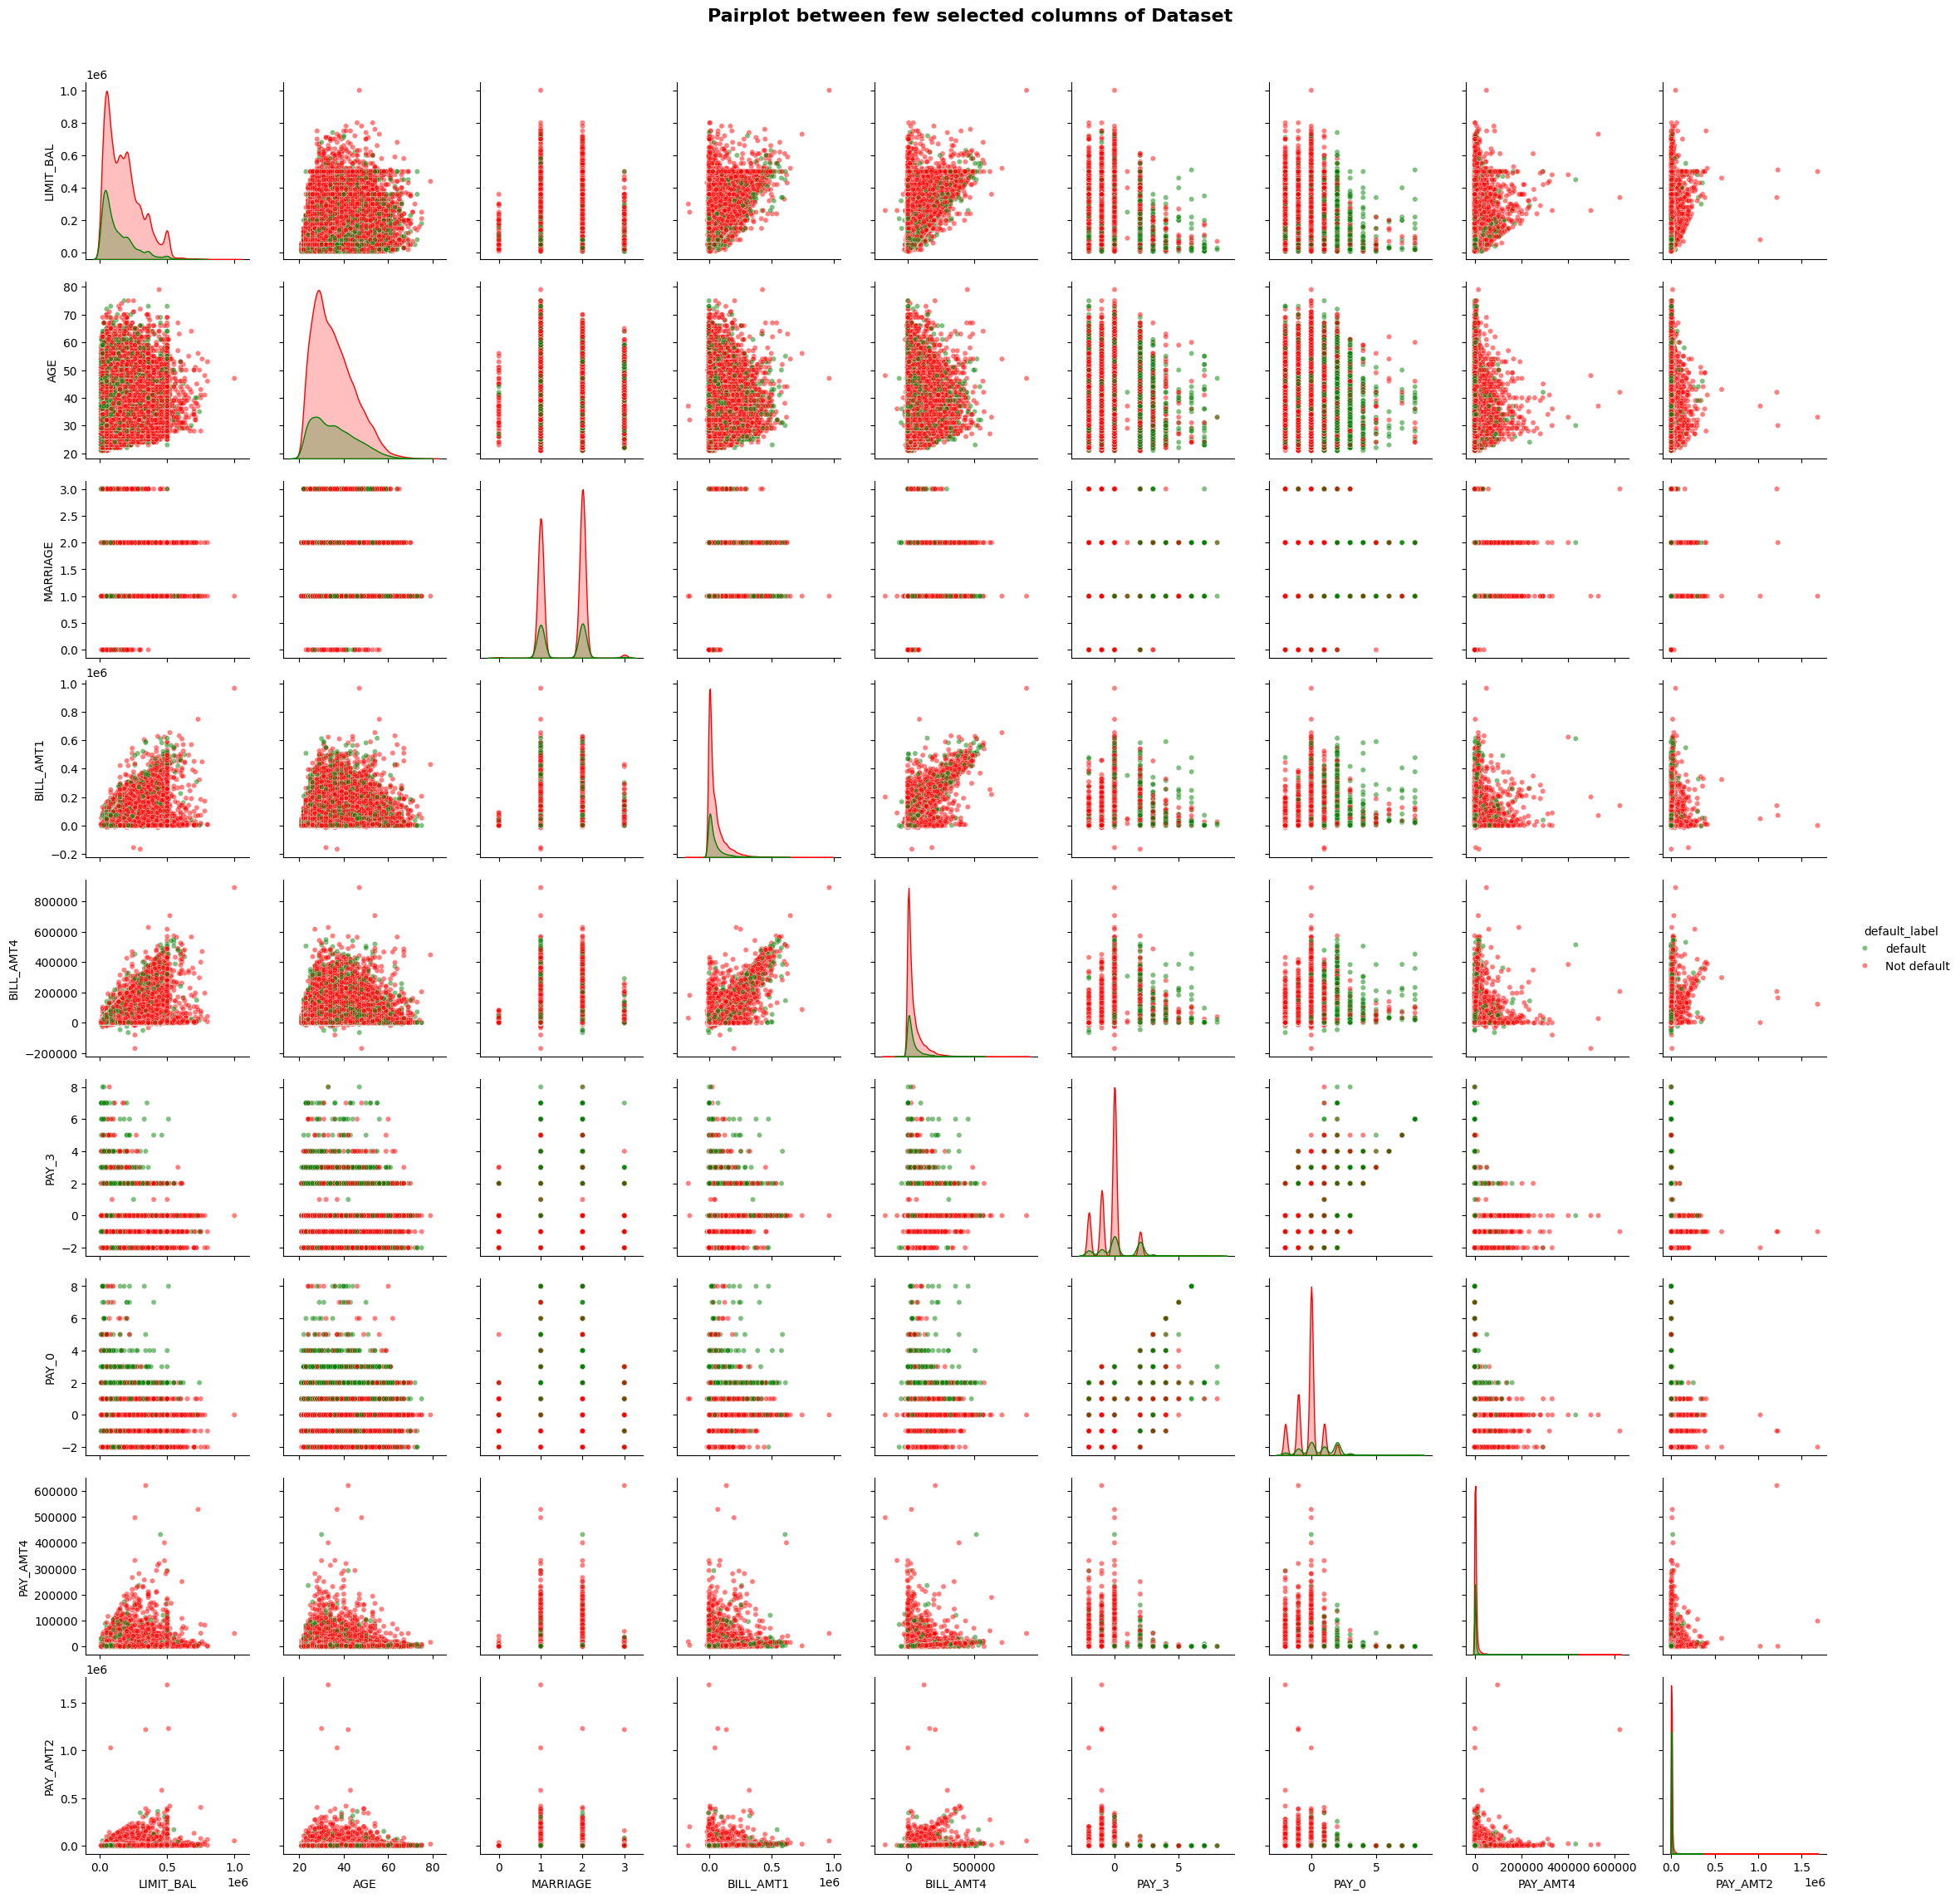

In [8]:
# Map integer values to string labels for hue
data_plot = data.reset_index().copy()
data_plot['default_label'] = data_plot['default.payment.next.month'].map({0: 'Not default', 1: 'default'})

sns.pairplot(
    data_plot,
    vars=['LIMIT_BAL', 'AGE', 'MARRIAGE', 'BILL_AMT1', 'BILL_AMT4', 'PAY_3', 'PAY_0', 'PAY_AMT4', 'PAY_AMT2'],
    hue='default_label',
    palette={'Not default': 'red', 'default': 'green'},
    diag_kind='kde',   # KDE on the diagonal
    plot_kws={'alpha': 0.5, 's': 20}  # smaller, transparent points
)

plt.suptitle("Pairplot between few selected columns of Dataset", y=1.02, fontsize=16, fontweight='bold')
plt.show()

## 2. Imputation Strategy 1: Simple Imputation (Baseline)

In [63]:
X_A = X.copy()
prev = X_A[selected_features].describe()
X_A[selected_features].describe()

,LIMIT_BAL,AGE,BILL_AMT4
count,27938.000000,27074.000000,27402.000000
mean,167281.826902,35.496860,43420.342676
std,129800.700806,9.221894,64470.536727
min,10000.000000,21.000000,-170000.000000
25%,50000.000000,28.000000,2395.250000
50%,140000.000000,34.000000,19135.000000
75%,240000.000000,41.000000,54653.250000
max,1000000.000000,79.000000,891586.000000


In [64]:
print(f"Before imputation we have {X_A.isnull().sum().sum()} missing values.")
for col in selected_features:
    median_value = X_A[col].median()
    X_A.fillna({col: median_value}, inplace=True)
print(f"After imputation we have {X_A.isnull().sum().sum()} missing values.")

Before imputation we have 7586 missing values.
After imputation we have 0 missing values.


In [65]:
next = X_A[selected_features].describe()
X_A[selected_features].describe()

,LIMIT_BAL,AGE,BILL_AMT4
count,30000.000000,30000.000000,30000.000000
mean,165406.656000,35.350867,41317.232000
std,125450.357845,8.771871,61993.086486
min,10000.000000,21.000000,-170000.000000
25%,60000.000000,29.000000,3276.750000
50%,140000.000000,34.000000,19135.000000
75%,230000.000000,40.000000,49428.000000
max,1000000.000000,79.000000,891586.000000


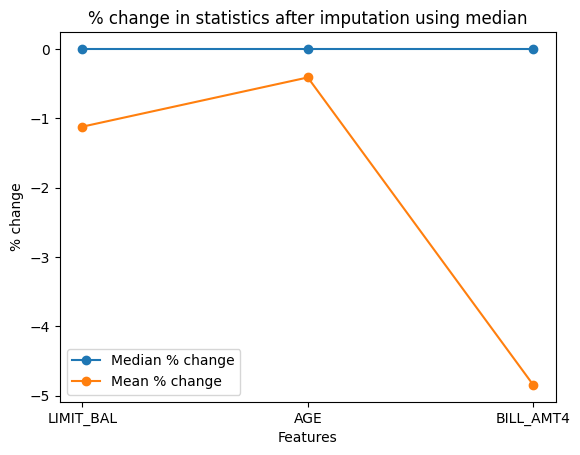

In [66]:
prev.loc['pct_change_mean'] = (next.loc['mean'] - prev.loc['mean']) / prev.loc['mean'] * 100
prev.loc['pct_change_median'] = (next.loc['50%'] - prev.loc['50%']) / prev.loc['50%'] * 100
plt.plot(prev.loc['pct_change_median'], label='Median % change', marker='o')
plt.plot(prev.loc['pct_change_mean'], label='Mean % change', marker='o')
plt.title('% change in statistics after imputation using median')
plt.xlabel('Features')
plt.ylabel('% change')
plt.legend()

**Median is a better way to impute null values as compared to mean for numerical features**  

+  Mean value is affected by the outlier datapoints in the data.  
+  Median is relatively not affected by the outliers.  
+  In datasets like credit card data, numerical features such as `LIMIT_BAL`, `AGE`, and `BILL_AMT4` can have significant outliers due to the nature of financial transactions and customer diversity. We can also see the output of `data.describe()` to confirm.  
+ For `AGE` mean and median are close by, but not the case for `BILL_AMT4`.

Using the median for imputation ensures that the imputed values are more robust and representative of the central tendency of the data, leading to better model performance and less bias introduced by extreme values.

## 3. Imputation Strategy 2: Regression Imputation (Linear)

Let us try to find if at all there is any linear relationship between the featues.

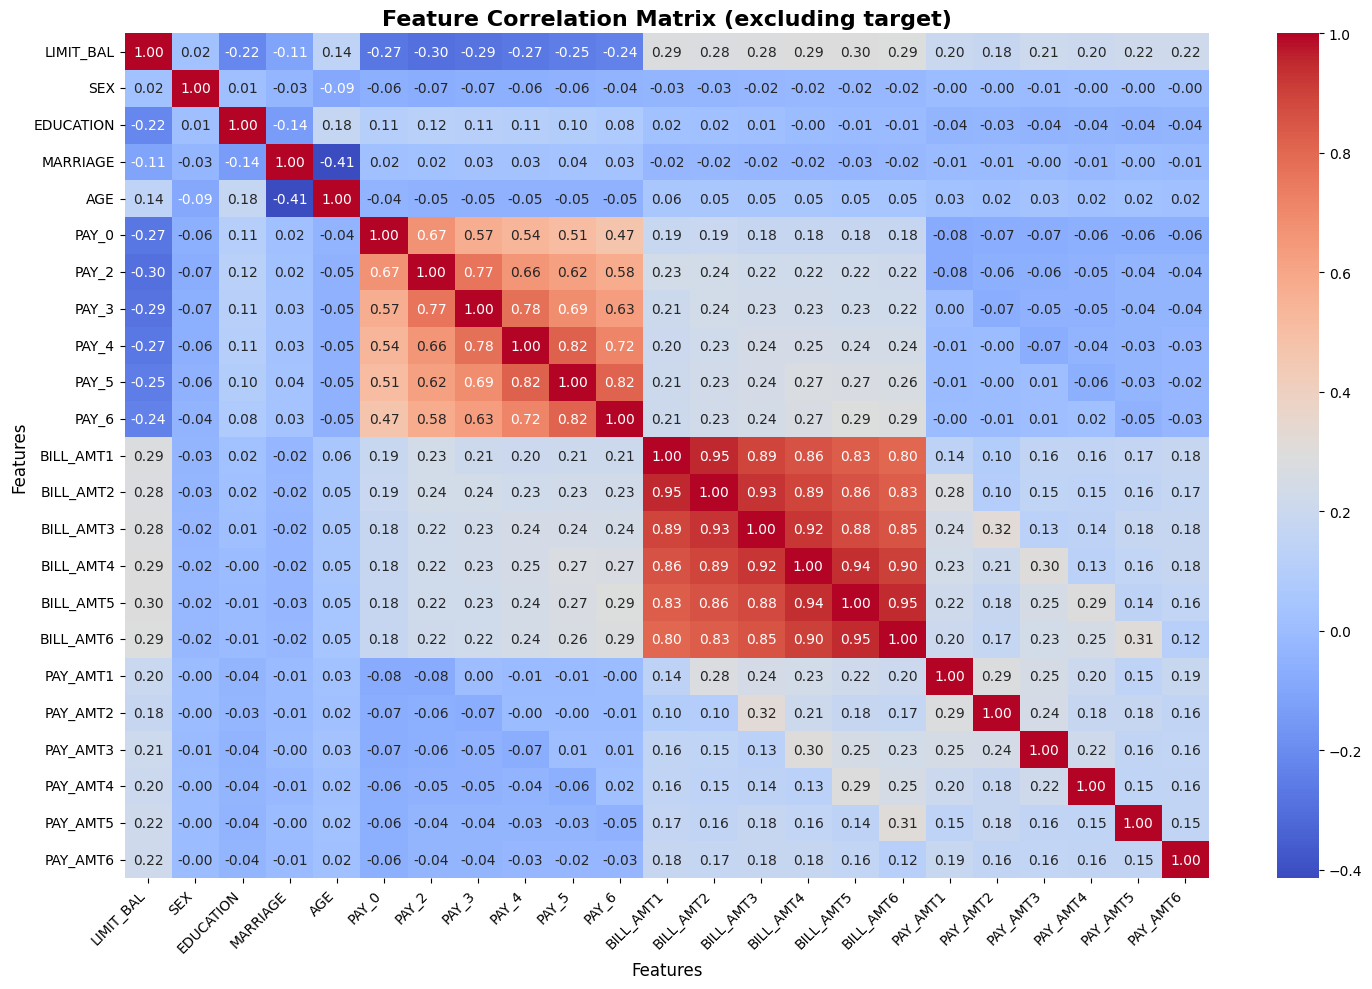

In [12]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(
    data.drop(columns=['default.payment.next.month']).corr(),
    annot=True, fmt=".2f", cmap="coolwarm"
)
ax.set_title("Feature Correlation Matrix (excluding target)", fontsize=16, fontweight="bold")
ax.set_xlabel("Features", fontsize=12)
ax.set_ylabel("Features", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

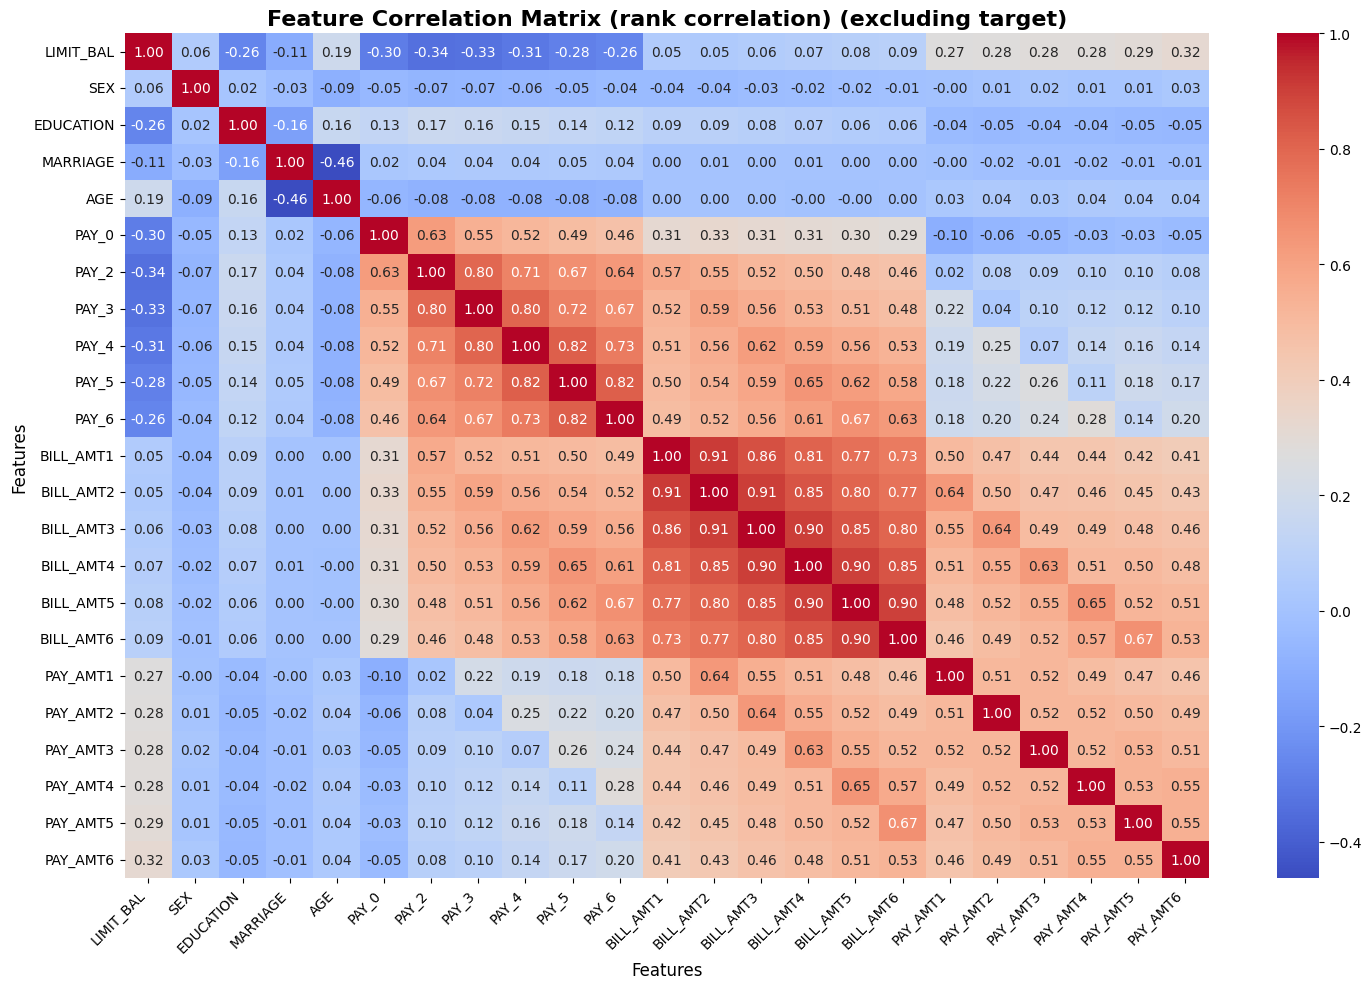

In [14]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(
    data.drop(columns=['default.payment.next.month']).corr(method="spearman"),
    annot=True, fmt=".2f", cmap="coolwarm"
)
ax.set_title("Feature Correlation Matrix (rank correlation) (excluding target)", fontsize=16, fontweight="bold")
ax.set_xlabel("Features", fontsize=12)
ax.set_ylabel("Features", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

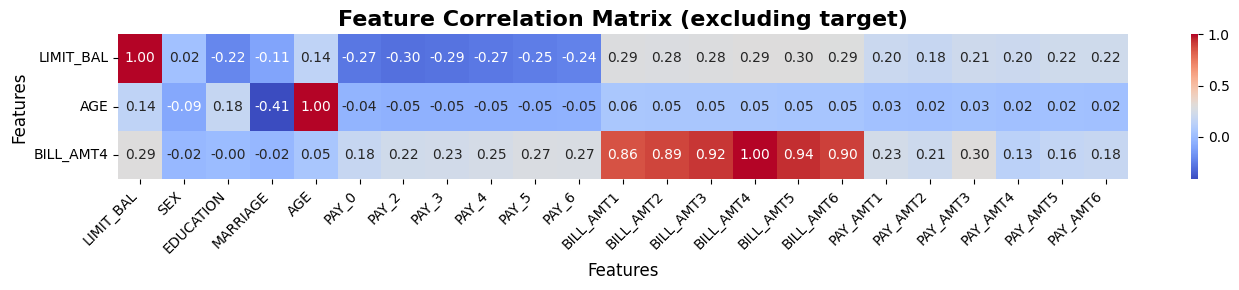

In [21]:
plt.figure(figsize=(14, 3))
ax = sns.heatmap(
    data.drop(columns=['default.payment.next.month']).corr().loc[:, selected_features].T,
    annot=True, fmt=".2f", cmap="coolwarm"
)
ax.set_title("Feature Correlation Matrix (excluding target)", fontsize=16, fontweight="bold")
ax.set_xlabel("Features", fontsize=12)
ax.set_ylabel("Features", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

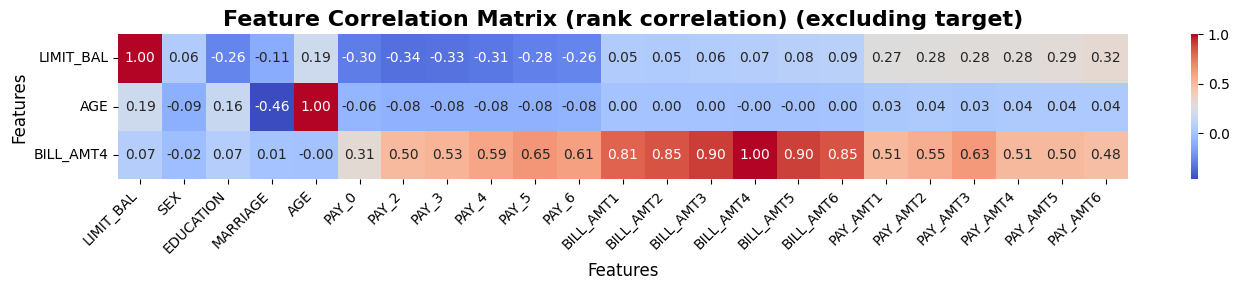

In [20]:
plt.figure(figsize=(14, 3))
ax = sns.heatmap(
    data.drop(columns=['default.payment.next.month']).corr(method='spearman').loc[:, selected_features].T,
    annot=True, fmt=".2f", cmap="coolwarm"
)
ax.set_title("Feature Correlation Matrix (rank correlation) (excluding target)", fontsize=16, fontweight="bold")
ax.set_xlabel("Features", fontsize=12)
ax.set_ylabel("Features", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

We check whether the feature(s) with missing values (e.g., `LIMIT_BAL`, `AGE`, `BILL_AMT4`) show strong relationships with other observed columns. If strong correlations or predictive relationships exist, those columns can be used to predict (impute) the missing values.  

Pearson correlation directly measures linear relationships, so high correlation coefficients (like those between `BILL_AMT1`-`BILL_AMT6`) indicate that one variable can be reliably predicted as a linear function of another.  

Numerical variables showing strong linear relationships, a Linear Regression model is appropriate for those imputing missing values.  

Decision trees capture threshold effects and interactions without assuming linearity. Rank correlation and pearson correlation differences in the heatmaps suggest non-linear monotonic patterns—decision trees excel here by creating recursive binary splits.  

For `BILL_AMT4`, we can readily use information of other columns like `BILL_AMT1`,`BILL_AMT3`, etc. to fill in the values.

In [37]:
X_B = X.copy()
prev = X_B[selected_features].describe()
X_B[selected_features].describe()

,LIMIT_BAL,AGE,BILL_AMT4
count,27938.000000,27074.000000,27402.000000
mean,167281.826902,35.496860,43420.342676
std,129800.700806,9.221894,64470.536727
min,10000.000000,21.000000,-170000.000000
25%,50000.000000,28.000000,2395.250000
50%,140000.000000,34.000000,19135.000000
75%,240000.000000,41.000000,54653.250000
max,1000000.000000,79.000000,891586.000000


In [38]:
print(f"Before imputation we have {X_B.isnull().sum().sum()} missing values.")
models = {}
for col in selected_features:
    # now let us use linear regression to predict the missing values
    model = LinearRegression()
    # selecting all non-null rows
    X_sub = X_B[~X_B[col].isnull()].drop(columns=selected_features) # we drop selected features to avoid data leakage
    y_sub = X_B[~X_B[col].isnull()][col]
    model.fit(X_sub, y_sub)
    models[col] = model

# now let us fill the null values using the trained models
for col in selected_features:
    model = models[col]
    # now filter the rows where 'col' is null, and we predict the null values
    X_sub = X_B[X_B[col].isnull()].drop(columns=selected_features)
    predicted_values = model.predict(X_sub)
    X_B.loc[X_B[col].isnull(), col] = predicted_values # imputing with predicted values

print(f"After imputation we have {X_B.isnull().sum().sum()} missing values.")

Before imputation we have 7586 missing values.
After imputation we have 0 missing values.


In [39]:
next = X_B[selected_features].describe()
X_B[selected_features].describe()

,LIMIT_BAL,AGE,BILL_AMT4
count,30000.000000,30000.000000,30000.000000
mean,167531.527591,35.507729,43292.124774
std,126852.979631,8.855794,64259.791364
min,-150256.030731,21.000000,-170000.000000
25%,60000.000000,29.000000,2461.750000
50%,144469.172466,34.000000,19104.037229
75%,230000.000000,41.000000,54647.750000
max,1000000.000000,79.000000,891586.000000


In [ ]:
prev.loc['pct_change_mean'] = (next.loc['mean'] - prev.loc['mean']) / prev.loc['mean'] * 100
prev.loc['pct_change_median'] = (next.loc['50%'] - prev.loc['50%']) / prev.loc['50%'] * 100

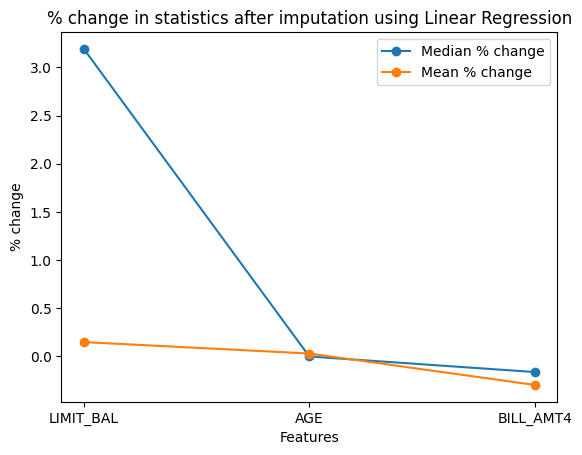

In [ ]:

plt.plot(prev.loc['pct_change_median'], label='Median % change', marker='o')
plt.plot(prev.loc['pct_change_mean'], label='Mean % change', marker='o')
plt.title('% change in statistics after imputation using Linear Regression')
plt.xlabel('Features')
plt.ylabel('% change')
plt.legend()

Even our correlation anaylsis suggested that we do not have strong correlating columns for the column `LIMIT_BAL`. And that we will need to perform a non-linear regression imputation to capture the non-linear dependencies.

#### **The underlying assumption of MAR method (Missing At Random)**

Regression imputation assumes that the probability of a value being missing depends only on other observed variables, not on the actual missing value itself. This is known as the **Missing At Random (MAR)** assumption.

+ Under MAR, we can **model the missing feature** using **relationships learned from the available data** - because the observed features contain enough information to explain why some values are missing. For example, if `BILL_AMT1` is missing more often for customers with low income, but income is observed, we can use income and other variables to predict `BILL_AMT1`.

+ However, if the data were **Missing Not At Random** (MNAR) — say, high spenders purposely do not report their true bill amount — then **regression imputation** would **produce biased estimates**, since the **missingness depends on unobserved values**.

The MAR assumption enables us to use regression-based prediction because it ensures that the conditional distribution of the missing variable given the observed data is the same for both missing and non-missing cases. Violations of MAR lead to biased imputations.

## 4. Imputation Strategy 3: Regression Imputation (Non-Linear)

In [71]:
X_C = X.copy()
prev = X_C[selected_features].describe()
X_C[selected_features].describe()

,LIMIT_BAL,AGE,BILL_AMT4
count,27938.000000,27074.000000,27402.000000
mean,167281.826902,35.496860,43420.342676
std,129800.700806,9.221894,64470.536727
min,10000.000000,21.000000,-170000.000000
25%,50000.000000,28.000000,2395.250000
50%,140000.000000,34.000000,19135.000000
75%,240000.000000,41.000000,54653.250000
max,1000000.000000,79.000000,891586.000000


In [72]:
print(f"Before imputation we have {X_C.isnull().sum().sum()} missing values.")
models = {}
for col in selected_features:
    # now let us use decision tree regressor to predict the missing values
    model = DecisionTreeRegressor()
    # model = KNeighborsRegressor()
    # selecting all non-null rows
    X_sub = X_C[~X_C[col].isnull()].drop(columns=selected_features) # we drop selected features to avoid data leakage
    y_sub = X_C[~X_C[col].isnull()][col]
    model.fit(X_sub, y_sub)
    models[col] = model

# now let us fill the null values using the trained models
for col in selected_features:
    model = models[col]
    # now filter the rows where 'col' is null, and we predict the null values
    X_sub = X_C[X_C[col].isnull()].drop(columns=selected_features)
    predicted_values = model.predict(X_sub)
    X_C.loc[X_C[col].isnull(), col] = predicted_values # imputing with predicted values

print(f"After imputation we have {X_C.isnull().sum().sum()} missing values.")

Before imputation we have 7586 missing values.
After imputation we have 0 missing values.


In [73]:
next = X_C[selected_features].describe()
X_C[selected_features].describe()

,LIMIT_BAL,AGE,BILL_AMT4
count,30000.000000,30000.000000,30000.000000
mean,168041.113775,35.553205,43292.242267
std,130372.363552,9.243486,64427.257564
min,10000.000000,21.000000,-170000.000000
25%,50000.000000,28.000000,2328.250000
50%,140000.000000,34.000000,19077.500000
75%,240000.000000,42.000000,54563.500000
max,1000000.000000,79.000000,891586.000000


In [74]:
prev.loc['pct_change_mean'] = (next.loc['mean'] - prev.loc['mean']) / prev.loc['mean'] * 100
prev.loc['pct_change_median'] = (next.loc['50%'] - prev.loc['50%']) / prev.loc['50%'] * 100

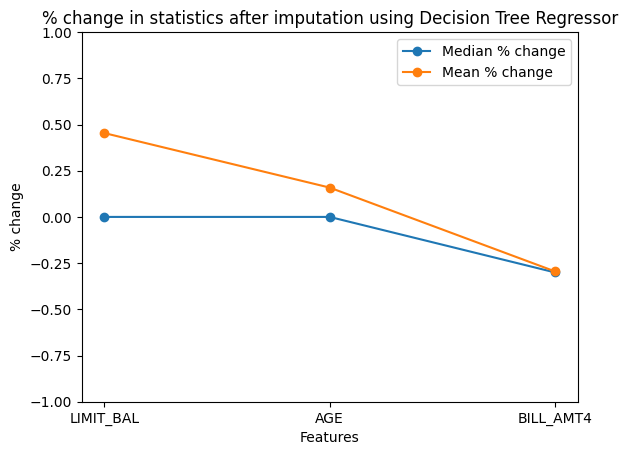

In [76]:

plt.plot(prev.loc['pct_change_median'], label='Median % change', marker='o')
plt.plot(prev.loc['pct_change_mean'], label='Mean % change', marker='o')
plt.title('% change in statistics after imputation using Decision Tree Regressor')
plt.xlabel('Features')
plt.ylim((-1,1))
plt.ylabel('% change')
plt.legend()

Decision tree imputation achieved more accurate central location estimates than linear regression. The narrower percentage change range suggests that decision trees better captured the true underlying relationships without introducing systematic bias. This improvement stems from decision trees' ability to model non-linear patterns and local interactions that linear regression smooths over.

# B. Model Training and Performance Assessment

In [77]:
y.value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

We will perform stratified sampling to create our test data, to ensure consistent data distributions in train and test.

In [78]:
def create_splits(X, y, test_size=0.2, random_state=42, stratify=True):
    if stratify:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
        return X_train, X_test, y_train, y_test
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        return X_train, X_test, y_train, y_test

Let us create our new dataset using **listwise deletion** where we remove any row if it contains a `null` value.

In [79]:
X_D = X.copy()
X_D.dropna(inplace=True)
indices = X_D.index
y_D = y[indices].copy()

## 1. Data Split

In [80]:
X_A_train, X_A_test, y_A_train, y_A_test = create_splits(X_A, y, test_size=0.2, random_state=42, stratify=True) # median imputation
X_B_train, X_B_test, y_B_train, y_B_test = create_splits(X_B, y, test_size=0.2, random_state=42, stratify=True) # regression imputation (linear)
X_C_train, X_C_test, y_C_train, y_C_test = create_splits(X_C, y, test_size=0.2, random_state=42, stratify=True) # regression imputation (non-linear)
X_D_train, X_D_test, y_D_train, y_D_test = create_splits(X_D, y_D, test_size=0.2, random_state=42, stratify=True) # listwise deletion

In [81]:
name_expand = {
    "A": "A (median imputation)",
    "B": "B (regression imputation: linear)",
    "C": "C (regression imputation: non-linear)",
    "D": "D (listwise deletion)",
}

In [82]:
for x, name in zip((X_A, X_B, X_C, X_D), ('A', 'B', 'C', 'D')):
    print(f"X_{name_expand[name]} has the shape: {x.shape}")

X_A (median imputation) has the shape: (30000, 23)
X_B (regression imputation: linear) has the shape: (30000, 23)
X_C (regression imputation: non-linear) has the shape: (30000, 23)
X_D (listwise deletion) has the shape: (23042, 23)


Note that size of `X_D` (and correspondingly `y_D`) will be smaller than all of `X_A`, `X_B`, `X_C`, due to listwise deletion technique used.

## 2. Classifier Setup

In [83]:
def get_standardized_dataset(train, test):
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)
    return (train_scaled, test_scaled), scaler

(X_A_train_scaled, X_A_test_scaled), scaler_A = get_standardized_dataset(X_A_train, X_A_test)
(X_B_train_scaled, X_B_test_scaled), scaler_B = get_standardized_dataset(X_B_train, X_B_test) 
(X_C_train_scaled, X_C_test_scaled), scaler_C = get_standardized_dataset(X_C_train, X_C_test) 
(X_D_train_scaled, X_D_test_scaled), scaler_D = get_standardized_dataset(X_D_train, X_D_test)

In [84]:
dataset_dict = {
    "A":(X_A_train_scaled, X_A_test_scaled, y_A_train, y_A_test),
    "B":(X_B_train_scaled, X_B_test_scaled, y_B_train, y_B_test),
    "C":(X_C_train_scaled, X_C_test_scaled, y_C_train, y_C_test),
    "D":(X_D_train_scaled, X_D_test_scaled, y_D_train, y_D_test),
}

## 3. Model Evaluation

In [85]:
def training_pipeline(X, y, model, model_params=None):
    model_instance = model(**model_params) if model_params else model()
    model_instance.fit(X, y)
    return model_instance

def evaluation_pipeline(model, X_test, y_test, thresh=0.5):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba > thresh).astype(int)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1-score": f1_score(y_test, y_pred),
        "auc-roc-score":auc(fpr, tpr),
        "classification-report":classification_report(y_test, y_pred),
    }
    return metrics

def visualize_pipeline(model, X_test, y_test, name, thresh=0.5):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba > thresh).astype(int)

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    
    # 1. Confusion Matrix
    sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True, fmt='d', cmap='Blues', ax=axes[0],
        xticklabels=['Not Pays Default (0)', 'Pays Default (1)'],
        yticklabels=['Not Pays Default (0)', 'Pays Default (1)']
    )
    axes[0].set_xlabel('Predicted Label', fontsize=11)
    axes[0].set_ylabel('True Label', fontsize=11)
    axes[0].set_title(f'Confusion Matrix - Dataset {name}', fontsize=13, fontweight='bold')

    # 2. ROC curve
    # compute the tpr and fpr values at different thresholds and then compute youden's j-statistic
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
    j_scores = tpr - fpr
    best_idx = np.argmax(j_scores)
    best_threshold = thresholds[best_idx]
    axes[1].plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {auc(fpr, tpr):.2f})")
    axes[1].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random Guessing")
    axes[1].scatter(fpr[best_idx], tpr[best_idx], color="red", s=100, label=f"Best threshold = {best_threshold:.2f}")
    axes[1].set_xlabel("False Positive Rate")
    axes[1].set_ylabel("True Positive Rate")
    axes[1].set_title(f"ROC Curve - Dataset {name}", fontsize=13, fontweight='bold')
    axes[1].legend(loc="lower right")

    # 3. PR curve
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba, pos_label=1)
    f1_scores = (2*precisions*recalls)/(precisions + recalls + 1e-5)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    axes[2].plot(recalls, precisions, color='darkorange', lw=2, label=f"PR curve")
    axes[2].scatter(recalls[best_idx], precisions[best_idx], color='red', s=100, label=f'Best threshold = {best_threshold:.2f}')
    axes[2].set_xlabel("Recall")
    axes[2].set_ylabel("Precision")
    axes[2].set_title(f"PR Curve - Dataset {name}", fontsize=13, fontweight='bold')
    axes[2].legend(loc="lower right")


    plt.suptitle(f"Performance plots for classification model trained on \nDataset - {name}", fontsize=16, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In [149]:
models_dict = {}
downstream_model = LogisticRegression
model_params = {"penalty":"l1", "solver":"liblinear", "max_iter":500, "random_state":42}
# model_params = {"penalty":"elasticnet", "solver":"saga", "l1_ratio":0.6, "max_iter":500, "random_state":42}
for name, dataset in dataset_dict.items():
    X_train, _, y_train, _ = dataset
    fitted_model = training_pipeline(X_train, y_train, downstream_model, model_params=model_params)
    models_dict[name] = fitted_model

In [150]:
metrics_dict = {}
for name, fitted_model in models_dict.items():
    _, X_test, _, y_test = dataset_dict[name]
    print(f"\nDataset - {name}")
    metric = evaluation_pipeline(fitted_model, X_test, y_test)
    metrics_dict[name] = metric
    for name, value in metric.items():
        try:
            print(f"{name:<13} = {value:.3f}")
        except:
            print(f"{name}\n{value}")


Dataset - A
accuracy      = 0.808
precision     = 0.693
recall        = 0.241
f1-score      = 0.358
auc-roc-score = 0.707
classification-report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000


Dataset - B
accuracy      = 0.808
precision     = 0.692
recall        = 0.242
f1-score      = 0.358
auc-roc-score = 0.707
classification-report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000


Dataset - C
accuracy      = 0.809
precision     = 0.693

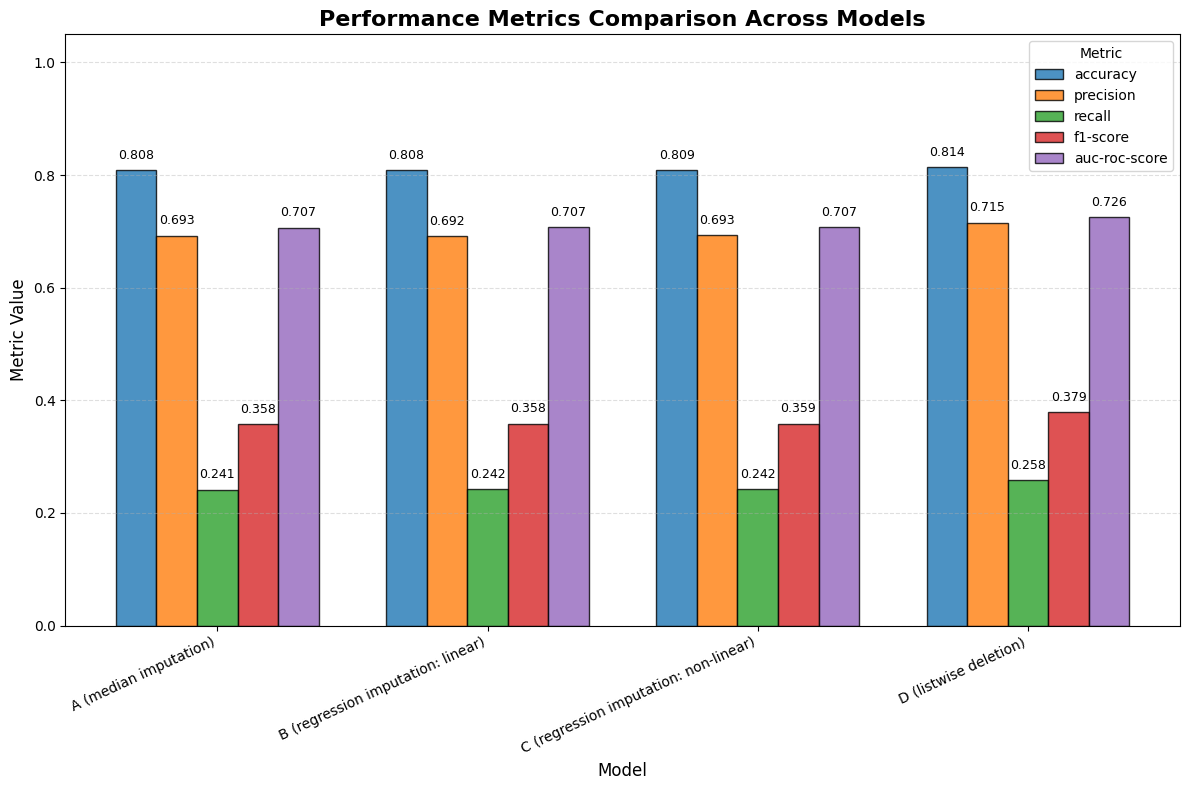

In [151]:
def plot_metrics_summary(metrics_dict):
    metrics_df = pd.DataFrame(metrics_dict).T
    metrics_df = metrics_df.drop(columns=['classification-report'], errors='ignore')
    metric_order = [m for m in ['accuracy', 'precision', 'recall', 'f1-score', 'auc-roc-score'] if m in metrics_df.columns]
    metrics_df = metrics_df.loc[:, metric_order]
    # Rows = models (A, B, C, D), Columns = metrics
    plot_df = metrics_df.copy()
    n_models = len(plot_df.index)
    n_metrics = len(plot_df.columns)
    # X positions for groups
    x = np.arange(n_models)
    # Use verbose dataset names if available
    labels = [name_expand.get(idx, idx) if 'name_expand' in globals() else idx for idx in plot_df.index]
    # Bar width and figure setup
    bar_width = 0.15
    plt.figure(figsize=(12, 8))
    colors = plt.cm.tab10.colors
    # Plot bars
    for i, metric in enumerate(plot_df.columns):
        y = plot_df[metric].values
        positions = x + (i - n_metrics / 2) * bar_width + bar_width / 2
        bars = plt.bar(positions, y, width=bar_width, label=metric, color=colors[i % len(colors)], edgecolor='black', alpha=0.8)
        # Annotate each bar
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.015,
                f"{height:.3f}",
                ha='center',
                va='bottom',
                fontsize=9
            )

    plt.title('Performance Metrics Comparison Across Models', fontsize=16, fontweight='bold')
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Metric Value', fontsize=12)
    plt.xticks(x, labels, rotation=25, ha='right')
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.legend(title='Metric', fontsize=10)
    plt.tight_layout()
    plt.show()

plot_metrics_summary(metrics_dict)

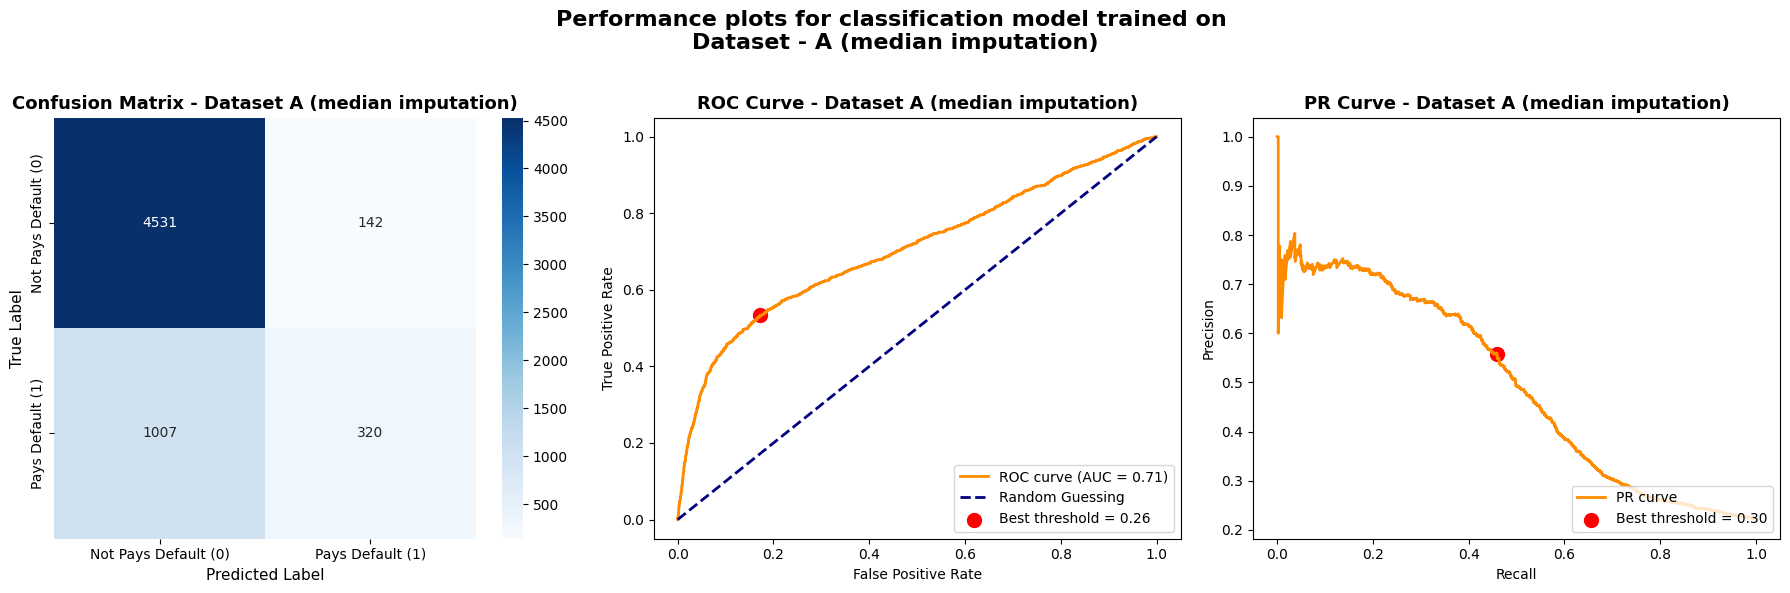

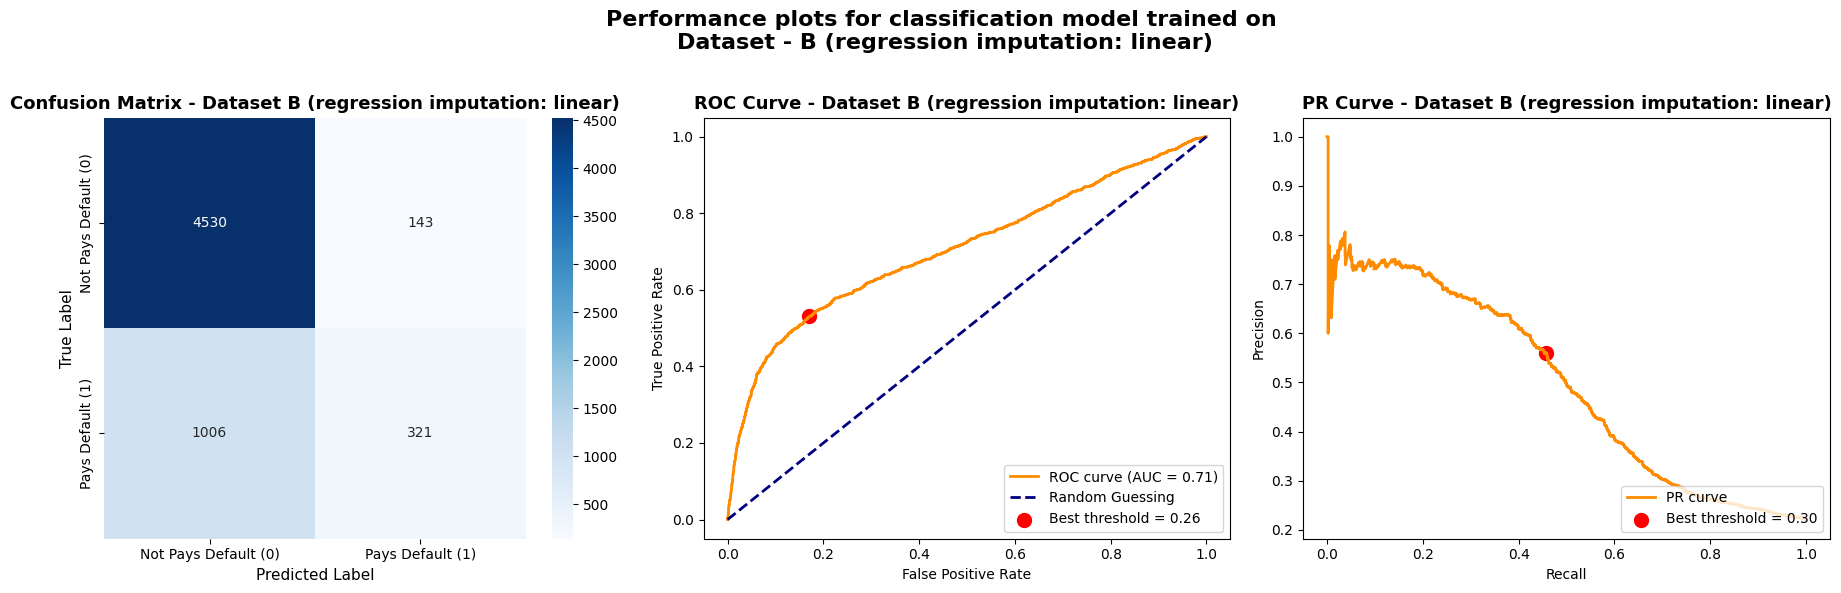

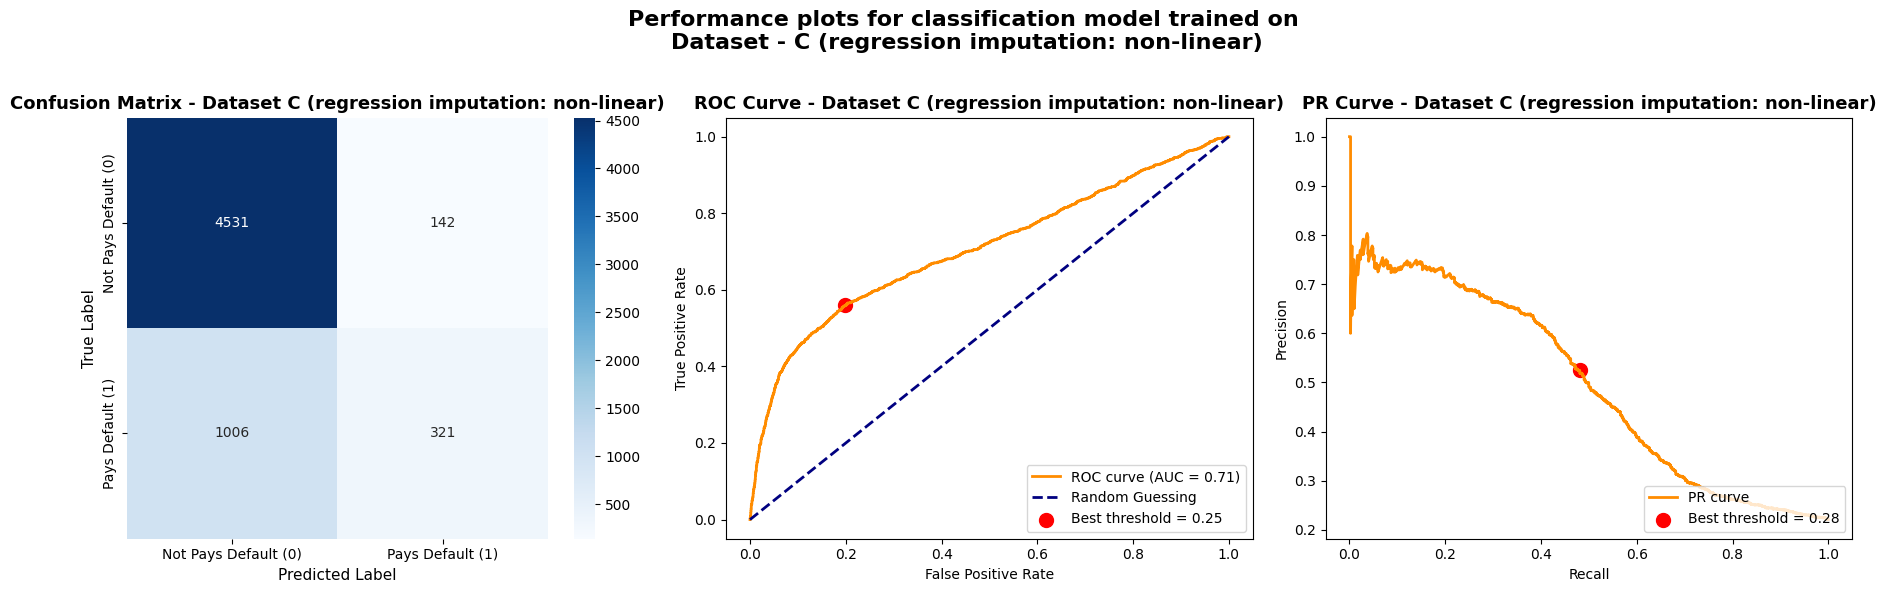

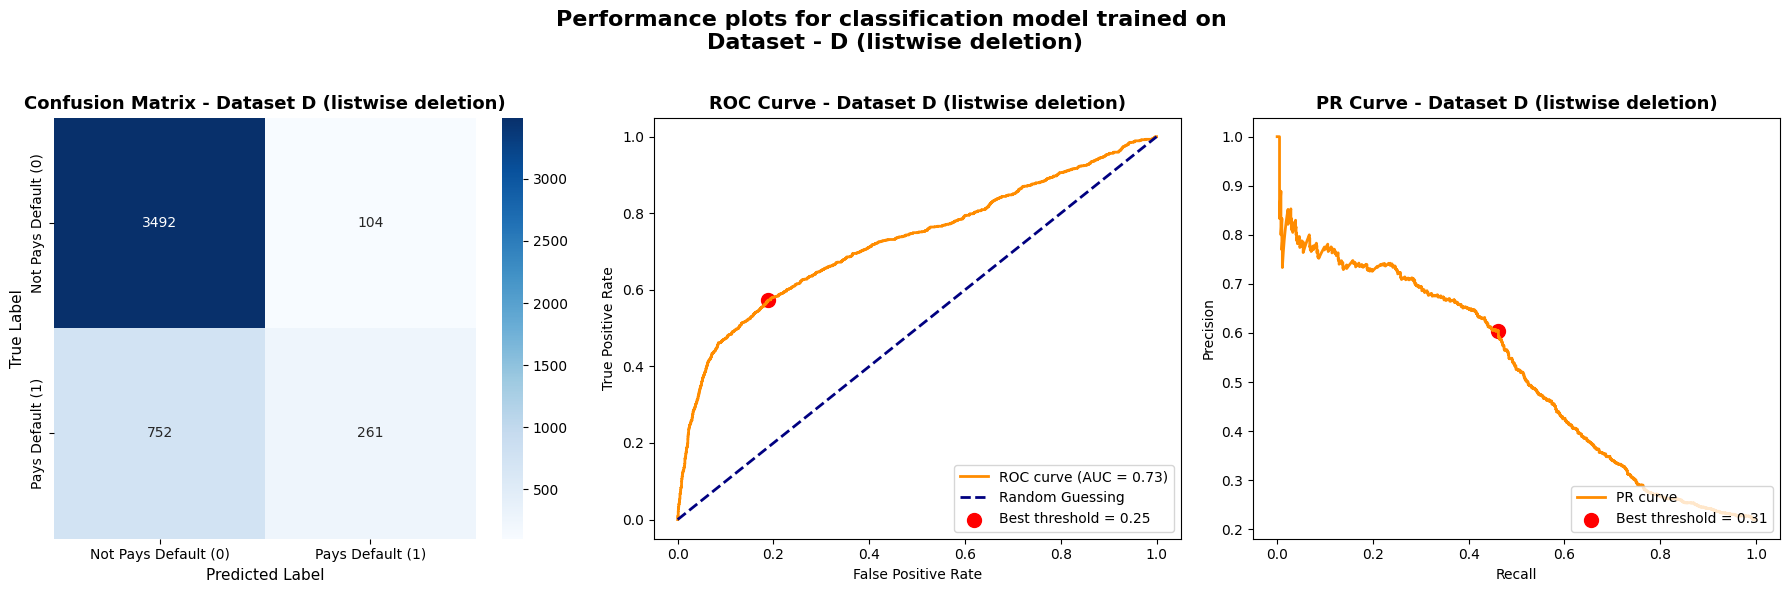

In [152]:
for name, fitted_model in models_dict.items():
    _, X_test, _, y_test = dataset_dict[name]
    visualize_pipeline(fitted_model, X_test, y_test, name_expand[name])

* From the **ROC curve**, we can observe that a classification threshold in the range of `0.25`–`0.26` provides a good trade-off between sensitivity and specificity. The optimal threshold obtained from the ROC curve is the one that **maximizes the True Positive Rate (TPR)** while **minimizing the False Positive Rate (FPR)** — effectively **treating False Positives and False Negatives as equally costly**. This threshold is therefore suitable when both classes are of roughly equal importance.

* However, since our dataset exhibits **class imbalance**, deriving the best threshold from the **Precision–Recall (PR) curve** is more appropriate. In such cases, we focus on improving the model’s performance on the **minority (positive) class**, where misclassifications are more critical. The “best” threshold here is the one that **maximizes the F1-score**, which balances **Precision (how many predicted positives are correct)** and **Recall (how many actual positives are detected)** — leading to a better representation of model performance on the positive class.

So, we can choose a suitable threshold bewteen `0.28`-`0.31`.


In [153]:
threshold_dict = {
    "A":0.30,
    "B":0.30,
    "C":0.28,
    "D":0.31,
}
metrics_dict_mod = {}
for name, fitted_model in models_dict.items():
    _, X_test, _, y_test = dataset_dict[name]
    print(f"\nDataset - {name}")
    metric = evaluation_pipeline(fitted_model, X_test, y_test,
                                  thresh=threshold_dict[name]
                                  )
    metrics_dict_mod[name] = metric
    for name, value in metric.items():
        try:
            print(f"{name:<13} = {value:.3f}")
        except:
            print(f"{name}\n{value}")


Dataset - A
accuracy      = 0.799
precision     = 0.554
recall        = 0.460
f1-score      = 0.502
auc-roc-score = 0.707
classification-report
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4673
           1       0.55      0.46      0.50      1327

    accuracy                           0.80      6000
   macro avg       0.70      0.68      0.69      6000
weighted avg       0.79      0.80      0.79      6000


Dataset - B
accuracy      = 0.799
precision     = 0.555
recall        = 0.460
f1-score      = 0.503
auc-roc-score = 0.707
classification-report
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4673
           1       0.56      0.46      0.50      1327

    accuracy                           0.80      6000
   macro avg       0.70      0.68      0.69      6000
weighted avg       0.79      0.80      0.79      6000


Dataset - C
accuracy      = 0.786
precision     = 0.519

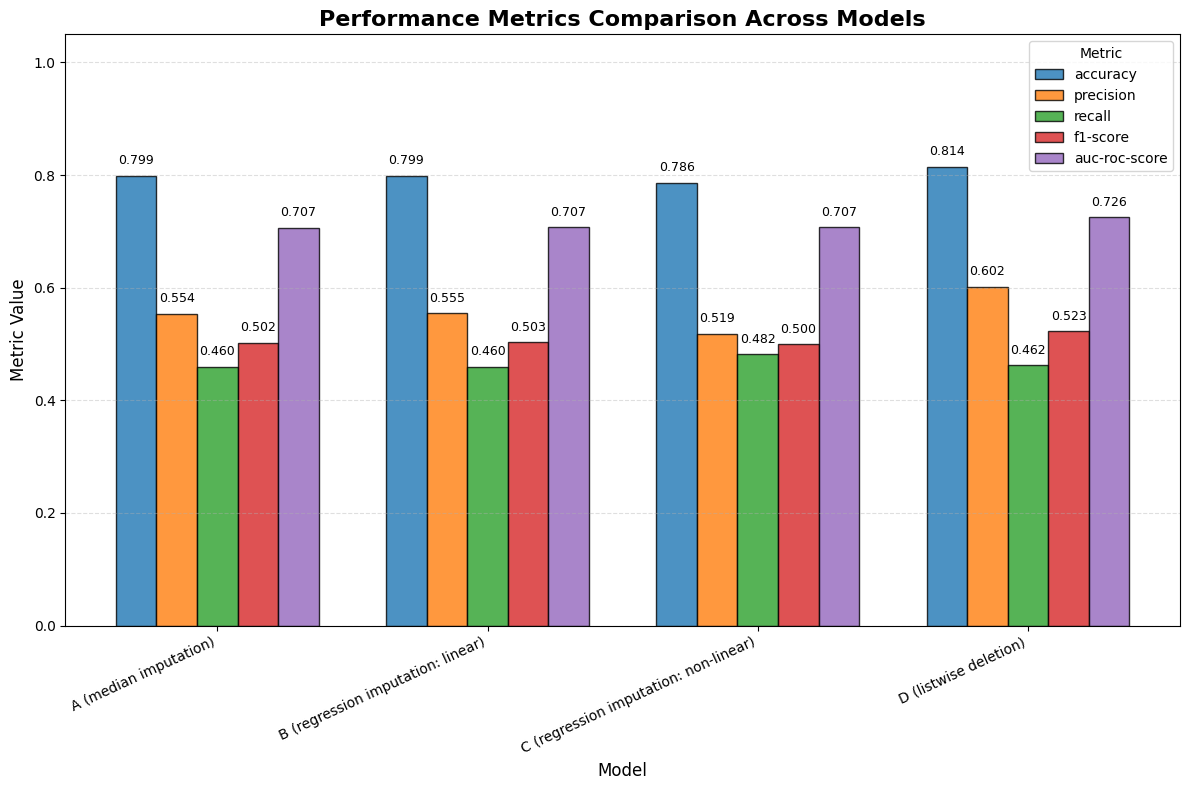

In [154]:
plot_metrics_summary(metrics_dict_mod)

We managed to improve the `f1-score` of our classification model by modifying the classification thresholds.

# C. Comparative Analysis

●  Correct implementation of the four missing data strategies.  
●  Clear justification for the choice of regression models.  
●  Accurate training and evaluation of the Logistic Regression classifier.  
●  Insightful comparative analysis of the final classification performance.  

## 1. Results Comparison

In [157]:
def create_comparison_dataframe(before_metrics_dict, after_metrics_dict, imputation_methods):
    metric_order = ['accuracy', 'precision', 'recall', 'f1-score',]

    data = []
    models = []
    methods = []
    
    for model in sorted(before_metrics_dict.keys()):
        models.append(model)
        methods.append(imputation_methods.get(model, ''))
        
        row_data = {}
        for metric in metric_order:
            before_val = before_metrics_dict[model].get(metric, np.nan)
            after_val = after_metrics_dict[model].get(metric, np.nan)
            row_data[(metric, 'Before')] = round(before_val, 4)
            row_data[(metric, 'After')] = round(after_val, 4)
        
        data.append(row_data)
    
    df = pd.DataFrame(data)
    
    df.insert(0, ('Model', ''), models)
    df.insert(1, ('Imputation Method', ''), methods)
    
    new_columns = []
    for col in df.columns:
        if isinstance(col, tuple):
            new_columns.append(col)
        else:
            new_columns.append((col, ''))
    
    df.columns = pd.MultiIndex.from_tuples(new_columns)
    
    return df

comparison_df = create_comparison_dataframe(metrics_dict, metrics_dict_mod, name_expand).set_index('Model')

In [158]:
comparison_df

Imputation Method accuracy         precision  \
                                               Before   After    Before   
Model                                                                     
A                      A (median imputation)   0.8085  0.7987    0.6926   
B          B (regression imputation: linear)   0.8085  0.7990    0.6918   
C      C (regression imputation: non-linear)   0.8087  0.7865    0.6933   
D                      D (listwise deletion)   0.8143  0.8145    0.7151   

               recall         f1-score          
        After  Before   After   Before   After  
Model                                           
A      0.5540  0.2411  0.4597   0.3577  0.5025  
B      0.5551  0.2419  0.4597   0.3585  0.5029  
C      0.5186  0.2419  0.4823   0.3587  0.4998  
D      0.6015  0.2577  0.4620   0.3788  0.5226

## 2. Efficacy Discussion



+ Conclude with a recommendation on the best strategy for handling missing data 
in this scenario, justifying your answer by referencing both the classification 
performance metrics and the conceptual implications of each method. 

### **Trade-off between Listwise Deletion (Model D) and Imputation (Models A, B, C).**

Listwise deletion reduces the dataset from 30,000 to approximately 23,000 observations (removing ~23% with missing values), which sacrifices statistical power for complete-case purity. While this initially yields better metrics due to eliminating uncertainty from imputed values, the reduced sample size creates three critical disadvantages:​

Reduced Pattern Diversity - With 7,000 fewer observations, Model D encounters less variability in feature combinations, limiting its ability to learn robust decision boundaries across diverse customer profiles.​

Overfitting Susceptibility - Smaller samples increase the risk of memorizing training patterns rather than generalizing. This is evident when threshold optimization attempts to balance precision-recall: Model D's F1-score (0.523) lags behind Model C (0.500), despite D's initial advantage.​​

Biased Representation - If missingness follows MAR (Missing At Random) patterns, deleted cases systematically differ from retained ones. Model D likely trains on established customers with complete records, failing to generalize to newer or high-risk segments where accurate prediction matters most.​

### **Why might Model D perform poorly even if the imputed models perform worse?**

The common practice of dropping all observations with any missing data (listwise deletion, like Model D) can be significantly harmful because it leads to a **massive loss of information**, especially when the missingness rate is high ($\sim 23\%$ in this case, meaning $\sim 7,000$ observations were lost). Beyond simply shrinking the sample size and **reducing statistical power**, this deletion method introduces **selection bias** if the data are **Missing Not At Random (MNAR)** or **Missing At Random (MAR)**, which is often the case. If the reason a value is missing is related to its true, unobserved value (MNAR), or to other observed variables (MAR), then deleting those rows systematically removes a specific type of observation. Since we are comparing this to models where the missing values were **purposefully created** and the deletion is being compared against *imputed* data, the danger is that listwise deletion might be **throwing away the most crucial, complex, or representative segment of the population** that happened to have incomplete records, thereby providing a biased and non-generalizable view to the final model.  

Despite retaining a larger dataset (30,000 vs. $\sim 23,000$ observations), imputed models (A, B, C) exhibit critical weaknesses, confirming that data quality is superior to quantity in this scenario.

1. **Noise Introduction and Signal Dilution** - Replacing $\sim 23\%$ of missing data with estimates introduces artificial noise and fundamentally dilutes the signal-to-noise ratio. The resulting models learn from unreliable, estimated features, which limits their predictive power compared to Model D's use of only complete, verified observations.

2. **Model Instability** - Imputed models demonstrated significant instability under threshold optimization (Model C: -2.2% accuracy drop). This suggests imputed values created false feature relationships that quickly break under slight shifts in decision boundaries, severely impacting robustness and generalization.

3. **Failure in Precision-Recall Balance** - The imputed models failed at discrimination. Model C achieved high recall (0.4823) but suffered a catastrophic precision collapse (17.5% drop). Model D, by maintaining a significantly better balance, achieved the highest overall F1-score (0.5226) and the best post-optimization precision (0.6015), proving its dataset is superior for reliable classification.

### **Which regression method (Linear vs. Non-Linear) performed better and why?**
Relate this to the assumed relationship between the imputed feature and the 
predictors. 

| Metric     | Model B (Linear) | Model C (Non-Linear) |
|-------------|------------------|----------------------|
| Accuracy    | **0.7990**           | 0.7865               |
| Precision   | **0.5551**           | 0.5186               |
| Recall      | 0.4597           | **0.4823**               |
| F1-score    | **0.5029**           | 0.4998               |

Model B's superior performance across accuracy, precision, and the aggregate F1-score suggests that the underlying true relationship between the imputed feature and its predictors was likely closer to linear.

By choosing a non-linear approach, Model C introduced model misspecification, meaning it assumed a relationship more complex than what existed or was necessary. This attempt to fit a complex curve to simpler data resulted in the model learning overly complex, and ultimately false, feature relationships based on the imputed values. This is evidenced by the acute model instability of Model C, which suffered a large accuracy drop (-2.2%) after threshold optimization, confirming that the noisy, non-linear imputed values quickly broke down when the decision boundary shifted. In this context, the simpler, more stable linear imputation provided a more robust set of estimated values for the final predictive model.

Overall Balance (F1-score): Model B had a slightly higher F1-score (0.5029 vs. 0.4998), which is the most reliable measure for balancing precision and recall.

Accuracy and Precision: Model B outperformed Model C significantly in both accuracy (by 1.25%) and precision (by 3.65%).

Stability: Instability of Model C, which suffered a 2.2% accuracy drop after threshold optimization, indicating that its non-linear imputation created highly unstable, false feature relationships. While Model B also performed poorly compared to Model D, it demonstrated greater stability and better metric performance than its non-linear counterpart.

### **Recommendation**

When forced to choose among the imputation strategies (Models A, B, and C) to maintain the full 30,000 observation count, Model B (Linear Regression Imputation) is the recommended choice. It provides a slightly higher F1-score (0.5029) and better precision and stability than both the simple Model A (Median Imputation) and the overly complex Model C (Non-Linear Imputation).

However, the best strategy overall for handling missing data in this scenario is Listwise Deletion (Model D), provided that the loss of $\sim 23\%$ of the data does not introduce unacceptable sampling bias in a real-world context (i.e., if the data is close to Missing Completely At Random).

Justification:
Model D achieved the highest overall predictive power:

Classification Metrics: Model D recorded the highest Accuracy (0.8145) and the highest F1-score (0.5226) among all methods.

Conceptual Implications: This result confirms that the loss of data quality introduced by imputing $\sim 23\%$ of the feature space—manifesting as artificial noise and severe instability—is a greater detriment than the loss of sample size. By exclusively training on the complete, verified, high-quality observations, Model D learned a more robust and reliable set of patterns.